<a href="https://www.kaggle.com/code/abdelazizsami/project-dr-semmelweis-and-the-importance-of-handw?scriptVersionId=198410262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

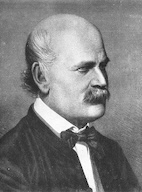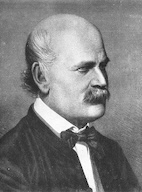

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [1]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093
0.025   -0.100968
0.975   -0.067854
dtype: float64


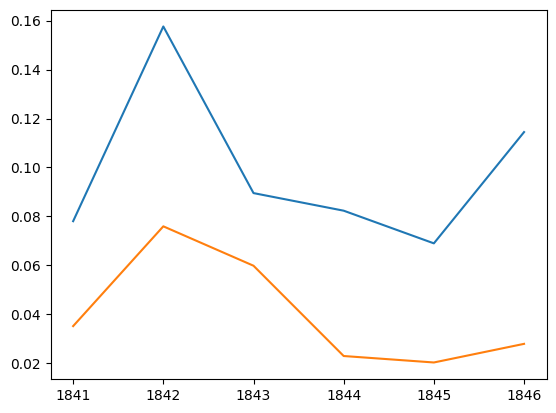

In [2]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

# What year had the highest yearly proportion of deaths at each clinic?

# Load and inspect the yearly data
yearly = pd.read_csv('/kaggle/input/dr-semmelweis-and-the-importance-of-handwashing/yearly_deaths_by_clinic.csv')
yearly.head()

# Add proportion_deaths to the DataFrames
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Plot the year versus proportion deaths and separate by clinic using a for loop
# You may prefer to identify the year without using a visualization, that's fine too!
for clinic in yearly['clinic'].unique():
    clinic_data = yearly[yearly['clinic'] == clinic]
    plt.plot(clinic_data['year'], clinic_data['proportion_deaths'], label=clinic)

# This code is optional but makes your visualization look neater and  readable
# plt.xlabel('Year')
# plt.ylabel('Proportion of Deaths')
# plt.title('Year vs Proportion of Deaths by Clinic')
# plt.legend(title='Clinic')
# plt.grid(True)
# plt.show()

# Identify the highest year in the visualization and save the integer year
highest_year = 1842

# What are the mean proportions of deaths before and after handwashing from the monthly data?
# Load and inspect the monthly data
monthly = pd.read_csv("/kaggle/input/dr-semmelweis-and-the-importance-of-handwashing/monthly_deaths.csv")
monthly.head()

# Add proportion_deaths to the DataFrame
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Add the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Create a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = monthly.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary)

# Analyze the difference in the mean monthly proportion of deaths and calculate a 95% confidence interval

# Split the monthly data into before and after handwashing was introduced
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

# Perform a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)